In [2]:
#Run it only when needs to start in between

import pandas as pd
import numpy as np
pd.options.display.max_columns = None
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from pylab import rcParams
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')

# import all the neccessary packages.
from sklearn.model_selection import cross_val_score, train_test_split 
#from sklearn import cross_validation
from sklearn.linear_model import Ridge, LassoCV
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection

rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'
#rates_ml.to_csv("rates_ml.csv",index_label=False)
rates_ml = pd.read_csv("rates_ml.csv")
rates_ml['BusinessYear'] = rates_ml['BusinessYear'].astype('int32')
rates_ml['Tobacco'] = rates_ml['Tobacco'].astype('category')
rates_ml['Duration'] = rates_ml['Duration'].astype('int32')
rates_ml['MetalLevel'] = rates_ml['MetalLevel'].astype('category')
rates_ml['IsEHB'] = rates_ml['IsEHB'].astype('category')
rates_ml['RatingAreaId'] = rates_ml['RatingAreaId'].astype('int32')
rates_ml['TEHBInnTier1IndividualMOOP'] = rates_ml['TEHBInnTier1IndividualMOOP'].astype('float32')
rates_ml['TEHBOutOfNetIndividualMOOP'] = rates_ml['TEHBOutOfNetIndividualMOOP'].astype('float32')
rates_ml_train_pred = rates_ml[rates_ml['BusinessYear'] < 2019].iloc[:,:-2]
rates_ml_test_pred  = rates_ml[rates_ml['BusinessYear'] == 2019].iloc[:,:-2]
rates_ml_train_target = rates_ml[rates_ml['BusinessYear'] < 2019].iloc[:,-1:]
rates_ml_test_target  = rates_ml[rates_ml['BusinessYear'] == 2019].iloc[:,-1:]
rates_ml_train_pred_dummies = pd.get_dummies(rates_ml_train_pred)
rates_ml_test_pred_dummies = pd.get_dummies(rates_ml_test_pred)
y_train = rates_ml_train_target['IndividualRateTotallog'].values
X_train = rates_ml_train_pred_dummies.values
y_test = rates_ml_test_target['IndividualRateTotallog'].values
X_test = rates_ml_test_pred_dummies.values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5155187 entries, 0 to 5155186
Data columns (total 12 columns):
Age                           int64
BusinessYear                  int64
RatingAreaId                  int64
Tobacco                       object
Duration                      int64
MetalLevel                    object
TEHBInnTier1IndividualMOOP    float64
TEHBOutOfNetIndividualMOOP    float64
IsEHB                         object
BenefitName                   int64
IndividualRateTotal           float64
IndividualRateTotallog        float64
dtypes: float64(4), int64(5), object(3)
memory usage: 511.3+ MB


In [5]:
# Lets determine if random search yielded a better model, we compare the base model with the best random search model.
# This function checks the performance of the model

def evaluate(model, test_features, test_labels,test_type='train'):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    r2 = r2_score(test_labels, predictions)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    print('Model Performance on ' , test_type)
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("The absolute error of ", test_type, " data is : ", mae)
    print("The MSE of " ,test_type, " data is : ", mse)
    print("The out of sample R square of " ,test_type, " data is " , r2)
    scores = [r2,mae,mse,accuracy]
    return scores 

In [9]:
# Grid with only the number of trees changed
tree_grid = [1,2,5,10,20,30,50,70,100,120,150]
columns=['R2','MAE','MSE','Accuracy']
score_test= pd.DataFrame(columns=columns)
score_train = pd.DataFrame(columns=columns)
for tree in tree_grid:
    best_estimator = RandomForestRegressor(n_estimators = tree, random_state = 7)
    best_estimator.fit(X_train,y_train)
    score_train.loc[len(score_train)] = evaluate(best_estimator, X_train, y_train,test_type='train')
    score_test.loc[len(score_train)] = evaluate(best_estimator, X_test, y_test,test_type='test')

Model Performance on  train
Accuracy = 99.28%.
The absolute error of  train  data is :  0.0496139260139537
The MSE of  train  data is :  0.007625305995911624
The out of sample R square of  train  data is  0.9733365575943951
Model Performance on  test
Accuracy = 98.30%.
The absolute error of  test  data is :  0.12197131496513447
The MSE of  test  data is :  0.026581262312979522
The out of sample R square of  test  data is  0.8879381870525821
Model Performance on  train
Accuracy = 99.29%.
The absolute error of  train  data is :  0.049151056868209884
The MSE of  train  data is :  0.006986123419132895
The out of sample R square of  train  data is  0.9755715902385595
Model Performance on  test
Accuracy = 98.32%.
The absolute error of  test  data is :  0.12017950123134093
The MSE of  test  data is :  0.024679764807065435
The out of sample R square of  test  data is  0.8959545579577244
Model Performance on  train
Accuracy = 99.29%.
The absolute error of  train  data is :  0.04882562162110411


In [10]:
score_train.to_csv("score_train.csv")
score_test.to_csv("score_test.csv")

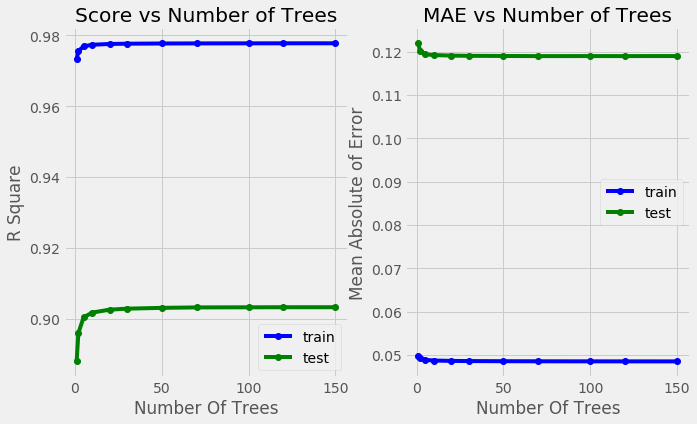

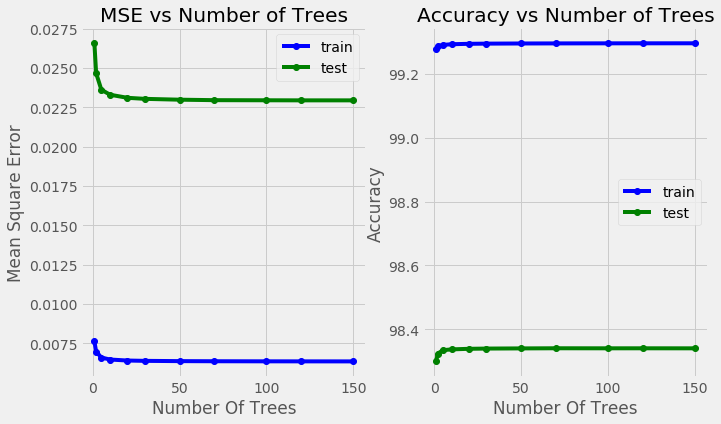

In [49]:
plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.plot(tree_grid, score_train['R2'], 'bo-', label = 'train')
plt.plot(tree_grid, score_test['R2'] , 'go-', label = 'test')
plt.legend()
plt.xlabel('Number Of Trees')
plt.ylabel('R Square')
plt.title('Score vs Number of Trees')

plt.subplot(122)
plt.plot(tree_grid, score_train['MAE'], 'bo-', label = 'train')
plt.plot(tree_grid, score_test['MAE'] , 'go-', label = 'test')
plt.legend()
plt.xlabel('Number Of Trees')
plt.ylabel('Mean Absolute of Error')
plt.title('MAE vs Number of Trees')

plt.subplots(1, 2, figsize=(10, 6))

plt.subplot(121)
plt.plot(tree_grid, score_train['MSE'], 'bo-', label = 'train')
plt.plot(tree_grid, score_test['MSE'] , 'go-', label = 'test')
plt.legend()
plt.xlabel('Number Of Trees')
plt.ylabel('Mean Square Error')
plt.title('MSE vs Number of Trees')


plt.subplot(122)
plt.plot(tree_grid, score_train['Accuracy'], 'bo-', label = 'train')
plt.plot(tree_grid, score_test['Accuracy'] , 'go-', label = 'test')
plt.legend()
plt.xlabel('Number Of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees')
plt.show()